## Using the Computer Vision API
The techniques used so far in this notebook show how you can perform simple image amnipulation and apply some popular algorithms to analyze images. More complex image analysis capabilities are encapsulated in the Computer Vision API cognitive service.

### Create a Computer Vision API Service
To provision a Computer Vision API service in your Azure subscription, Follow these steps:

1. Open another browser tab and navigate to https://portal.azure.com.
2. Sign in using your Microsoft account.
3. Click **+ New**, and in the **AI + Cognitive Services** category, click **See all**.
4. In the list of cognitive services, click **Computer Vision API**.
5. In the **Computer Vision API** blade, click **Create**.
6. In the **Create** blade, enter the following details, and then click **Create**
  * **Name**: A unique name for your service.
  * **Subscription**: Your Azure subscription.
  * **Location**: Choose the Azure datacenter location where you want to host your service.
  * **Pricing tier**: Choose the F0 pricing tier.
  * **Resource Group**: Choose the existing resource group you created in the previous lab (or create a new one if you didn't complete the previous lab)
  * Read the notice about the use of your data, and select the checkbox.
7. Wait for the service to be created.
8. When deployment is complete, click **All Resources** and then click your Computer Vision service to open its blade.
9. In the blade for your Computer Vision service, note the **Endpoint** URL. Then assign the base URI (*location*.api.cognitive.microsoft.com) for your service to the **visionURI** variable in the cell below.
10. In the blade for your Computer Vision service, click **Keys** and then copy **Key 1** to the clipboard and paste it into the **visionKey** variable assignment value in the cell below. 
11. Run the cell below to assign the variables.


In [1]:
visionURI = 'https://fevaworks-computervision.cognitiveservices.azure.com/'
visionKey = '83aa567b087d4afcab41f2190202f4d3'

### Get An Image from a URL
Run the code in the cell below to retrieve the image description:

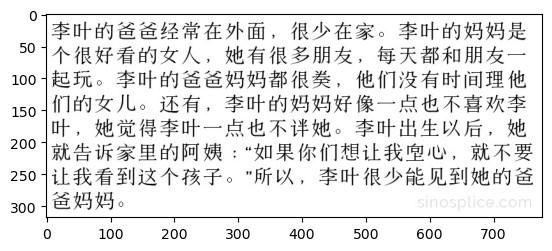

In [49]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import requests
from io import BytesIO

# img_url = 'https://umbrellacreative.com.au/wp-content/uploads/2020/01/hide-the-pain-harold-why-you-should-not-use-stock-photos-1024x683.jpg'
#img_url = 'https://upload.wikimedia.org/wikipedia/commons/b/b1/UML_Sequence_diagram.JPG'
# img_url = 'https://img.freepik.com/free-photo/brunette-forest-walks-with-cute-dog_1157-35205.jpg'
#img_url = 'https://onlinetexttools.com/images/examples-onlinetexttools/text-custom-font.png'

img_url = 'https://c7.staticflickr.com/8/7498/30154318702_831fa09e26_o.jpg'



# Get the image and show it
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))
imshow(img)

### Use the Computer Vision API to Get Image Features
The Computer Vision API uses a machine learning model that has been trtained with millions of images. It can extract features from images and return a suggested description, as well as details about the image file and a suggested list of "tags" that apply to it.

Run the cell below to see what caption the Computer Vision API suggests for the image above.

In [52]:
import requests
import json

# Replace with your API endpoint and key
endpoint = visionURI
subscription_key = visionKey

# Send a POST request to the API with the image URL
headers = {"Ocp-Apim-Subscription-Key": subscription_key}

#params = {"visualFeatures": "Description"}
#params = {"visualFeatures": "Color"}
params =  {"visualFeatures": "OCR"}#, "language":"en"}

data = {"url": img_url}

if params["visualFeatures"]=="OCR":
    response = requests.post(endpoint + "/vision/v3.2/ocr", headers=headers, params=params, json=data)
else:
    response = requests.post(endpoint + "/vision/v3.2/analyze", headers=headers, params=params, json=data)

# Parse the JSON response and extract the alt text
#print(response.text)
alt_text=""
if params["visualFeatures"]=="Description":
    alt_text = json.loads(response.text)["description"]["captions"][0]["text"]
elif params["visualFeatures"]=="Color":
    alt_text = json.loads(response.text)["color"]["dominantColorForeground"]
elif params["visualFeatures"]=="OCR":
    #alt_text = json.loads(response.text)["regions"][0]["lines"][0]["words"][0]["text"]
    #json.loads(response.text)["regions"][0]["lines"][0]
    for regions in json.loads(response.text)["regions"]:
        for lines in regions["lines"]:
            for words in lines["words"]:
                alt_text += (words["text"] + " ")
    

# Print the alt text
print("Alt text:", alt_text)


Alt text: 李 叶 的 爸 爸 经 常 在 外 面 ， 很 少 在 家 。 李 叶 的 妈 妈 是 个 很 好 看 的 女 人 ， 她 有 很 多 朋 发 ， 每 天 都 和 朋 发 一 起 玩 。 李 叶 的 爸 爸 妈 妈 都 很 癸 ， 他 们 没 有 时 间 理 他 们 的 女 儿 。 还 有 ， 李 叶 的 妈 妈 好 像 一 点 也 不 喜 欢 李 叶 ， 她 觉 得 李 叶 一 点 也 不 讠 半 她 。 李 叶 出 生 以 后 ， 她 就 告 诉 家 里 的 阿 姨 ： “ 如 果 你 们 想 让 我 心 ， 就 不 要 让 我 看 到 这 个 孩 子 。 " 所 以 ， 李 叶 很 少 能 见 到 她 的 爸 妈 妈 


## Read printed and handwritten text
Run the code in the cell below to retrieve the text in the image:

In [34]:
pip install --upgrade azure-cognitiveservices-vision-computervision

     -------------------------------------- 85.4/85.4 kB 963.4 kB/s eta 0:00:00
     ---------------------------------------- 41.7/41.7 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 192.9/192.9 kB ? eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [55]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = visionKey
endpoint = visionURI

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'''
OCR: Read File using the Read API, extract text - remote
This example will extract text in an image, then print results, line by line.
This API call can also extract handwriting style text (not shown).
'''
print("===== Read File - remote =====")
# Get an image with text
read_image_url = "https://c7.staticflickr.com/8/7498/30154318702_831fa09e26_o.jpg"

# Call API with URL and raw response (allows you to get the operation location)
read_response = computervision_client.read(read_image_url,  raw=True)

# Get the operation location (URL with an ID at the end) from the response
read_operation_location = read_response.headers["Operation-Location"]
# Grab the ID from the URL
operation_id = read_operation_location.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)


===== Read File - remote =====
李叶的爸爸经常在外面,很少在家。李叶的妈妈是
[7.0, 10.0, 753.0, 10.0, 753.0, 42.0, 7.0, 42.0]
个很好看的女人,她有很多朋友,每天都和朋友一
[8.0, 49.0, 753.0, 48.0, 753.0, 80.0, 8.0, 80.0]
起玩。李叶的爸爸妈妈都很类,他们没有时间理他
[7.0, 86.0, 752.0, 86.0, 752.0, 118.0, 7.0, 117.0]
们的女儿。还有,李叶的妈妈好像一点也不喜欢李
[7.0, 124.0, 753.0, 124.0, 753.0, 156.0, 7.0, 156.0]
叶,她觉得李叶一点也不详她。李叶出生以后,她
[7.0, 161.0, 753.0, 161.0, 753.0, 195.0, 7.0, 195.0]
就告诉家里的阿姨:“如果你们想让我应心,就不要
[6.0, 200.0, 763.0, 200.0, 763.0, 231.0, 6.0, 231.0]
让我看到这个孩子。”所以,李叶很少能见到她的爸
[7.0, 238.0, 764.0, 237.0, 764.0, 271.0, 7.0, 271.0]
爸妈妈。
[8.0, 276.0, 124.0, 276.0, 124.0, 308.0, 8.0, 308.0]
sinosplice.com
[580.0, 283.0, 763.0, 282.0, 763.0, 307.0, 580.0, 309.0]


In [75]:
import requests

url = "https://fevaworkscustomvision4-prediction.cognitiveservices.azure.com/customvision/v3.0/Prediction/3a746d17-4914-4bbc-9b90-662c5ea5839e/classify/iterations/HikingPhotoRunning/url"


headers = {
    'Prediction-Key': '951f8da6ee5048a9ad477ad055a70fbe',
    'Content-Type': 'application/json'
}

body = {
#    "Url": "https://runkeeper.com/cms/wp-content/uploads/sites/4/2022/12/Home-01@2x-640x660.jpg"
#    "Url": "https://expatliving.hk/wp-content/uploads/2017/11/Claire-Price-Trail-Running-AugSep-2017.jpg"
    "Url": "https://www.discoverhongkong.com/content/dam/dhk/intl/explore/great-outdoors/trail-running-in-hong-kong-law-chor-kin/trail-running-in-hong-kong-1920x1080.jpg"
}

response = requests.post(url, headers=headers, json=body)
#print(response.text)
print(response.json()['predictions'][0]['tagName'])
print("Tag Name\tProbability")
for predictions in response.json()['predictions']:
    print(predictions['tagName'] + "\t," + format(predictions["probability"]*100,"0.2f")+"%")

hiking
Tag Name	Probability
hiking	,63.87%
running	,36.06%
photographer	,0.07%
